## 13.2 모의실험을 통한 비교

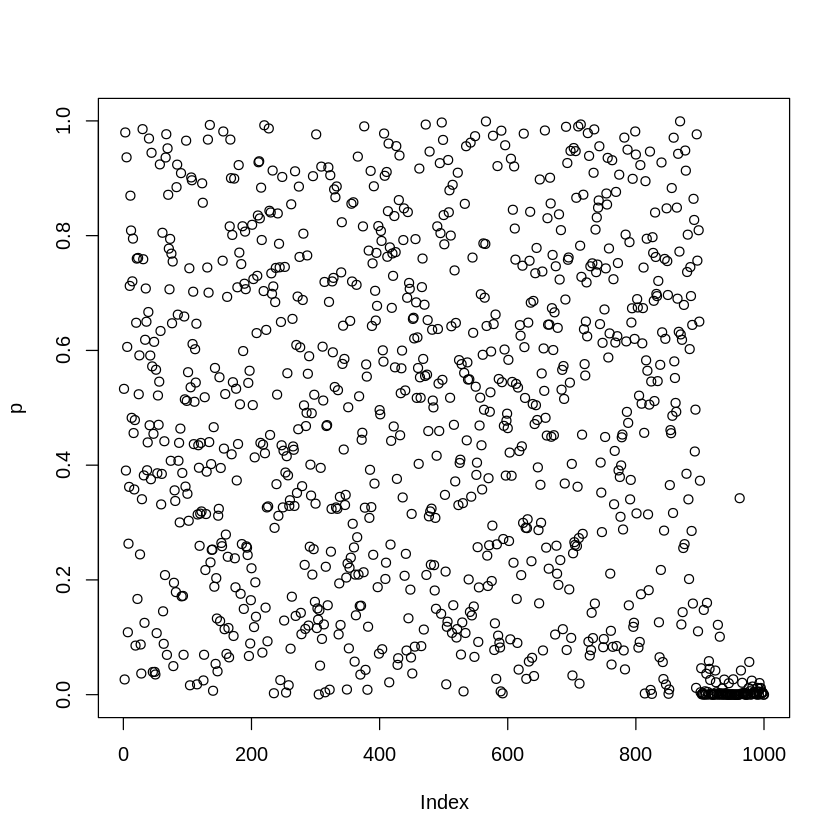

In [1]:
set.seed(333)
x = c(rnorm(900), rnorm(100, mean = 3))
p = pnorm(x, lower.tail = FALSE)
plot(p)

### (1) 비조정

In [2]:
test = p > 0.05
summary(test[1:900])  # 제 1종오류 비율 : 43/900
summary(test[901:1000])  # 제 2종오류 비율 : 7/100

   Mode   FALSE    TRUE 
logical      43     857 

   Mode   FALSE    TRUE 
logical      93       7 

### (2) Bonferroni 조정

In [3]:
bontest = p > 0.00005
summary(bontest[1:900]) # 제 1종오류 비율 : 0/900
summary(bontest[901:1000])  # 제 2종오류 비율 : 79/100

   Mode    TRUE 
logical     900 

   Mode   FALSE    TRUE 
logical      21      79 

### (3) FDR 통제

In [4]:
psort = sort(p)
i = 1000
while(psort[i] > i* 0.05/1000){
  i = i-1
  if(i==0) break
}
fdrtest = rep(TRUE, 1000)
fdrtest[match(psort[0:i], p)] = FALSE
summary(fdrtest[1:900])  # 제 1종오류 비율 : 6/900
summary(fdrtest[901:1000])  # 제 2종오류 비율 : 35/100

   Mode   FALSE    TRUE 
logical       6     894 

   Mode   FALSE    TRUE 
logical      65      35 

### (4) pFDR 통제

In [5]:
install.packages("BiocManager")
BiocManager::install("qvalue")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.21), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'qvalue'

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Old packages: 'bit', 'cpp11', 'curl', 'devtools', 'gert', 'haven', 'highr',
  'isoband', 'jsonlite', 'pkgload', 'processx', 'readxl', 'rmarkdown',
  'roxygen2', 'testthat', 'tidyverse', 'usethis', 'whisker', 'xml2', 'boot',
  'foreign'



In [6]:
library(qvalue)
pfdrtest = qvalue(p)$qvalue > 0.05
summary(pfdrtest[1:900])  # 제 1종오류 비율 : 8/900
summary(pfdrtest[901:1000])  # 제 2종오류 비율 : 31/100

   Mode   FALSE    TRUE 
logical       8     892 

   Mode   FALSE    TRUE 
logical      69      31 